Random Forest

1: Random Forest on Iris Dataset

✅ Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



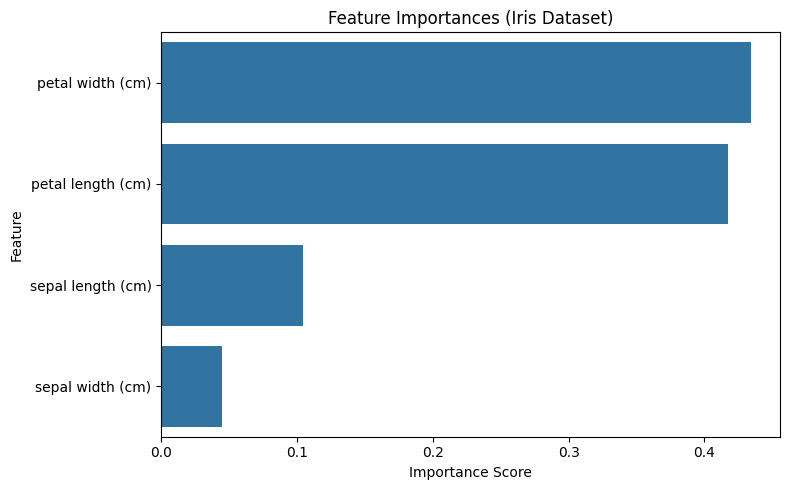

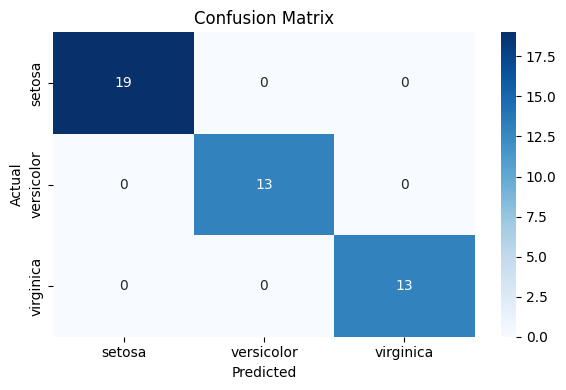

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 🔥 Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importances (Iris Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 📊 Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Random Forest Classification on Titanic Dataset

Titanic Dataset Accuracy: 0.7090909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        22
           1       0.73      0.82      0.77        33

    accuracy                           0.71        55
   macro avg       0.70      0.68      0.69        55
weighted avg       0.70      0.71      0.70        55



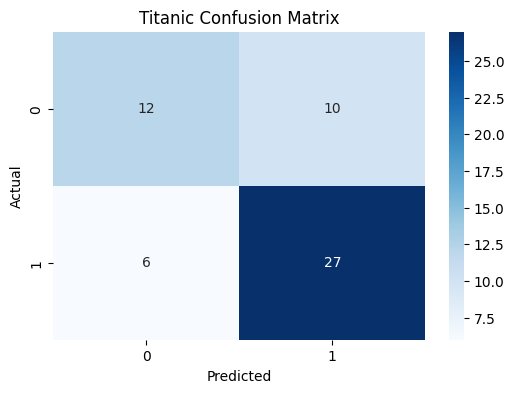

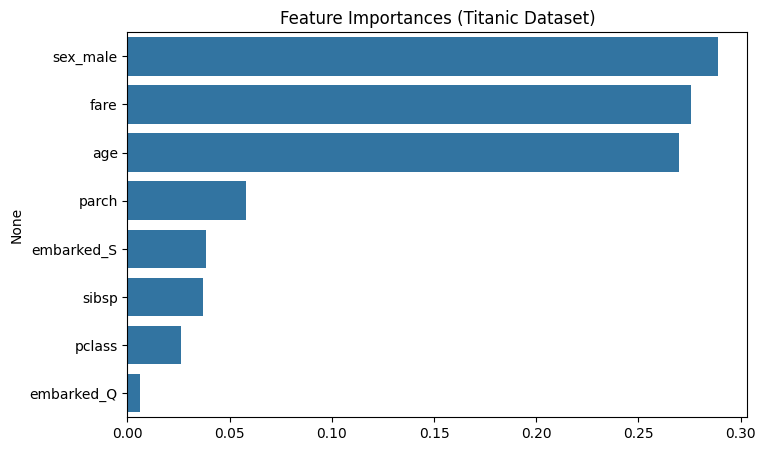

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Basic preprocessing: drop rows with missing values
titanic = titanic.dropna(subset=['age', 'fare', 'embarked', 'sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'])

# Select features and target
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic['survived']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("Titanic Dataset Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Titanic Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances (Titanic Dataset)")
plt.show()


Random Forest Regression on California Housing Dataset

Mean Squared Error: 0.255
R2 Score: 0.805


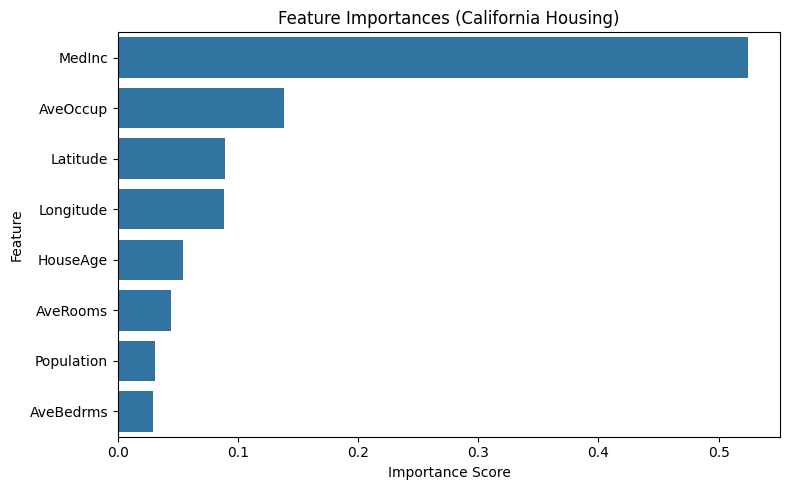

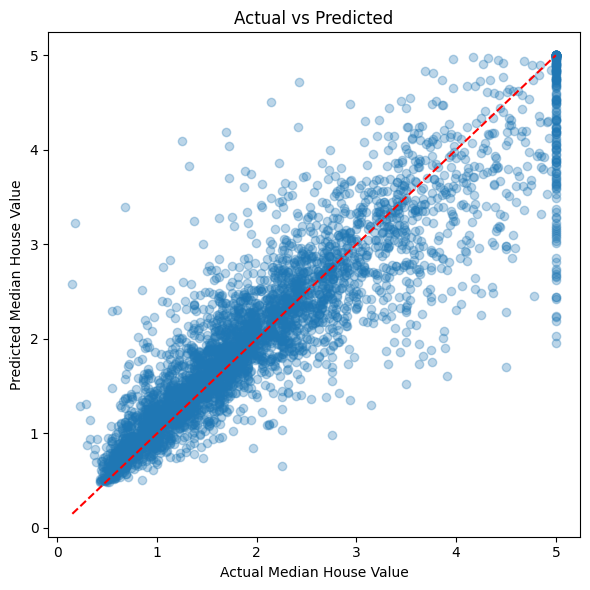

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R2 Score: {r2:.3f}")

# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importances (California Housing)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot true vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()
